## 데이터 정보

데이터를 불러와서 .info() 와 .describe()를 찍어보고 어떤 전처리가 필요할 지 고민해 봅시다.

In [2]:
import pandas as pd
import numpy as np

DATA_PATH = "./data/taxi_fare_data.csv"

# 데이터를 DataFram의 형태로 불러옵니다.
df = pd.read_csv(DATA_PATH, quoting=3)

df.head()

,Unnamed: 0,id,pickup_datetime,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,passenger_count,fare_amount
0,0,4142,2015-01-07 15:32,-263,-374,396.0,67.0,-2,31
1,1,1392,2015-10-21 22:52,-65,-44,39.0,62.0,2,74
2,2,4606,2017-05-07 3:25,442,424,458.0,328.0,-2,6
3,3,1600,2017-05-14 9:57,-349,269,-340.0,143.0,-2,66
4,4,4332,2017-04-11 16:01,-119,264,-243.0,494.0,2,88


In [3]:
df.describe()

,Unnamed: 0,id,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,passenger_count,fare_amount
count,1000.000000,1000.000000,1000.000000,1000.000000,991.000000,992.000000,1000.000000,1000.000000
mean,499.500000,2935.029000,-3.204000,-8.680000,-13.288597,5.837702,1.424000,45.102000
std,288.819436,1164.143399,297.196491,287.981359,287.623139,280.483335,2.279346,33.888553
min,0.000000,1001.000000,-500.000000,-500.000000,-499.000000,-500.000000,-2.000000,-100.000000
25%,249.750000,1880.000000,-262.250000,-268.250000,-260.000000,-221.250000,0.000000,29.000000
50%,499.500000,2842.500000,3.500000,-4.500000,-16.000000,-6.500000,1.000000,48.000000
75%,749.250000,3953.250000,262.000000,239.000000,219.500000,242.750000,3.000000,68.000000
max,999.000000,4997.000000,498.000000,499.000000,499.000000,499.000000,5.000000,99.000000


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1000 non-null   int64  
 1   id                 1000 non-null   int64  
 2   pickup_datetime    1000 non-null   object 
 3   pickup_latitude    1000 non-null   int64  
 4   pickup_longitude   1000 non-null   int64  
 5   dropoff_latitude   991 non-null    float64
 6   dropoff_longitude  992 non-null    float64
 7   passenger_count    1000 non-null   int64  
 8   fare_amount        1000 non-null   int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 70.4+ KB


## 실습 3

전처리를 수행해 봅시다.

In [3]:
# df에서 Unnamed: 0 feature 데이터를 제거하고 del_un_df에 저장합니다.
del_un_df = df.drop(['Unnamed: 0'], axis='columns')

# del_un_df에서 id feature 데이터를 제거하고 del_un_id_df에 저장합니다.
del_un_id_df = del_un_df.drop(['id'], axis='columns')

# del_un_id_df의 누락된 데이터가 있는 행을 제거하고 removed_df에 저장합니다.
removed_df = del_un_id_df.dropna()

removed_df.head()

,pickup_datetime,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,passenger_count,fare_amount
0,2015-01-07 15:32,-263,-374,396.0,67.0,-2,31
1,2015-10-21 22:52,-65,-44,39.0,62.0,2,74
2,2017-05-07 3:25,442,424,458.0,328.0,-2,6
3,2017-05-14 9:57,-349,269,-340.0,143.0,-2,66
4,2017-04-11 16:01,-119,264,-243.0,494.0,2,88


In [4]:
# 결측값 처리 함수입니다.
def del_missing(df):
    
    # df에서 Unnamed: 0 feature 데이터를 제거하고 del_un_df에 저장합니다.
    del_un_df = df.drop(['Unnamed: 0'], axis='columns')

    # del_un_df에서 id feature 데이터를 제거하고 del_un_id_df에 저장합니다.
    del_un_id_df = del_un_df.drop(['id'], axis='columns')
    
    # del_un_id_df의 누락된 데이터가 있는 행을 제거하고 removed_df에 저장합니다.
    removed_df = del_un_id_df.dropna()
    
    return removed_df

df = del_missing(df)
df.head()

,pickup_datetime,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,passenger_count,fare_amount
0,2015-01-07 15:32,-263,-374,396.0,67.0,-2,31
1,2015-10-21 22:52,-65,-44,39.0,62.0,2,74
2,2017-05-07 3:25,442,424,458.0,328.0,-2,6
3,2017-05-14 9:57,-349,269,-340.0,143.0,-2,66
4,2017-04-11 16:01,-119,264,-243.0,494.0,2,88


## 실습 4

In [5]:
df.describe()

,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,passenger_count,fare_amount
count,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000
mean,-2.073663,-9.560040,-13.288597,5.939455,1.424823,45.079717
std,297.180018,288.324123,287.623139,280.606638,2.274618,33.985509
min,-500.000000,-500.000000,-499.000000,-500.000000,-2.000000,-100.000000
25%,-262.000000,-269.500000,-260.000000,-221.500000,0.000000,29.000000
50%,4.000000,-5.000000,-16.000000,-5.000000,1.000000,48.000000
75%,262.000000,238.500000,219.500000,243.500000,3.000000,68.000000
max,498.000000,499.000000,499.000000,499.000000,5.000000,99.000000


In [6]:
# 1.리스트를 입력으로 받아서 해당 리스트 내에 음수값이 있으면 그 위치(인덱스)들을 리스트로 출력하는 함수를 만듭니다.  
def get_negative_index(list_data):
    
    neg_idx = []
    
    for i, value in enumerate(list_data):
        # 음수값이 있으면 그 위치(인덱스)들을 neg_idx로 추가시킵니다.
        # value값이 음수일 때 해당하는 인덱스 i를 리스트 neg_idx에 append하세요.
        if value < 0:
            neg_idx.append(list_data.index[i])
        
    return neg_idx

print(get_negative_index(df["passenger_count"]))
print(get_negative_index(df["fare_amount"]))

[0, 2, 3, 8, 16, 21, 30, 31, 40, 42, 49, 51, 67, 70, 72, 77, 79, 81, 82, 83, 88, 95, 104, 109, 110, 111, 124, 127, 134, 142, 145, 147, 148, 149, 153, 167, 172, 180, 181, 183, 184, 188, 195, 203, 212, 213, 217, 221, 224, 225, 228, 230, 233, 235, 240, 246, 249, 253, 254, 265, 267, 269, 270, 271, 272, 273, 292, 293, 298, 302, 333, 339, 345, 349, 354, 358, 359, 360, 369, 370, 372, 374, 375, 380, 382, 390, 394, 395, 400, 401, 404, 410, 412, 421, 425, 428, 430, 434, 439, 440, 441, 442, 450, 451, 455, 460, 464, 467, 469, 471, 475, 481, 485, 486, 487, 489, 491, 494, 497, 498, 501, 505, 507, 509, 511, 512, 522, 527, 528, 534, 544, 547, 558, 559, 560, 562, 569, 575, 584, 591, 597, 604, 609, 612, 613, 618, 622, 625, 630, 632, 634, 642, 644, 645, 647, 649, 651, 653, 657, 663, 665, 673, 674, 677, 680, 685, 688, 690, 693, 696, 699, 700, 702, 707, 709, 713, 714, 719, 722, 723, 724, 736, 737, 739, 741, 742, 745, 747, 761, 763, 766, 781, 787, 788, 795, 808, 809, 811, 812, 816, 820, 822, 823, 828, 832, 

In [7]:
# 불러온 DataFrame의 각 인덱스의 값들을 변수로 저장합니다.
fare_amount = df['fare_amount']
passenger_count = df['passenger_count']
pickup_longitude = df['pickup_longitude']
pickup_latitude = df['pickup_latitude']
dropoff_longitude = df['dropoff_longitude']
dropoff_latitude = df['dropoff_latitude']

In [8]:
# 2.DataFrame 내에 제거해야 하는 이상 값의 인덱스를 반환하는 함수를 만듭니다.
def outlier_index():
    
    # get_negative_index() 함수를 통해서,
    # fare_amount와 passenger_count 내의 음수값들의 인덱스를 반환합니다.
    idx_fare_amount = get_negative_index(fare_amount)
    idx_passenger_count = get_negative_index(passenger_count)
    
    idx_zero_distance = []    
    idx = [i for i in range(len(passenger_count))]
    zipped = zip(idx, pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude)
    
    # 결측치 처리를 수행하게 되면 Dataframe의 인덱스와 i 값은 다릅니다.
    # Dataframe.index[i]를 사용하여 Dataframe의 인덱스를 저장해봅시다.
    for i, x, y, _x, _y in zipped:
    
        # 타는 곳(pickup_longitude,pickup_latitude)과 내리는 곳(drop_longitude, drop_latitude)이
        # 같은 데이터의 인덱스를 idx_zero_distance에 저장합니다.
        # x와 _x가, y가 y_y와 같을 때 해당하는 인덱스 i를 idx_zero_distance에 append하세요.
        if (x == _x) and (y == _y):
            idx_zero_distance.append(df.index[i])
    
    # 제거해야하는 인덱스의 리스트들(idx_fare_amount,idx_passenger_count,idx_zero_distance)
    # 간의 중복을 없앤 리스트를 만들어줍니다.
    total_index4remove = list(set(idx_fare_amount + idx_passenger_count + idx_zero_distance))
    
    return total_index4remove

# 3.인덱스를 기반으로 DataFrame 내의 데이터를 제거하고, 제거된 DataFrame을 반환하는 함수를 만듭니다.
def remove_outlier(dataframe, list_idx):
    return dataframe.drop(list_idx)

In [9]:
# 이상치를 제거하기 전의 데이터 정보를 확인해 봅시다.
print('이상치를 제거하기 전의 데이터:')
df.info()

이상치를 제거하기 전의 데이터:
<class 'pandas.core.frame.DataFrame'>
Index: 991 entries, 0 to 999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pickup_datetime    991 non-null    object 
 1   pickup_latitude    991 non-null    int64  
 2   pickup_longitude   991 non-null    int64  
 3   dropoff_latitude   991 non-null    float64
 4   dropoff_longitude  991 non-null    float64
 5   passenger_count    991 non-null    int64  
 6   fare_amount        991 non-null    int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 61.9+ KB


In [10]:
# 이상치를 제거합니다.
remove_index = outlier_index()
new = remove_outlier(df, remove_index)

print("제거 해야 하는 열의 개수 :", len(remove_index))
print("제거 된 열의 개수 :", len(df) - len(new))
print('이상치를 제거한 후의 데이터:')
new.info()

제거 해야 하는 열의 개수 : 278
제거 된 열의 개수 : 278
이상치를 제거한 후의 데이터:
<class 'pandas.core.frame.DataFrame'>
Index: 713 entries, 1 to 998
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pickup_datetime    713 non-null    object 
 1   pickup_latitude    713 non-null    int64  
 2   pickup_longitude   713 non-null    int64  
 3   dropoff_latitude   713 non-null    float64
 4   dropoff_longitude  713 non-null    float64
 5   passenger_count    713 non-null    int64  
 6   fare_amount        713 non-null    int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 44.6+ KB


## 실습5

In [11]:
# 불러온 pickup_datetime은 ['2009-06-15 17:26:21 UTC', ...] 과 같은 형태를 지니고 있습니다.
pickup_datetime = new['pickup_datetime'] 

print(pickup_datetime.iloc[0])

2015-10-21 22:52


In [12]:
# 우선 연월일('YYYY-MM-DD')과 시간('HH:MM:SS')으로 나누어 주고 이를 year_date, time 변수로 각각 넣어줍니다.
year_date = []
time = []

for data in pickup_datetime :
    date, time_ = data.split()
    year_date.append(date)
    time.append(time_)

print(year_date[:10])
print(time[:10])

['2015-10-21', '2017-04-11', '2015-04-26', '2015-03-04', '2017-04-24', '2015-09-15', '2015-08-15', '2017-10-03', '2017-03-26', '2015-01-15']
['22:52', '16:01', '3:51', '14:21', '6:56', '20:00', '22:29', '6:15', '14:42', '5:32']


In [13]:
# 연월일 변수에서 각각의 '연도', '월', '일'을 추출하여 years, months, days 변수에 넣어줍니다.
years = []
months = []
days = []

for data in year_date:
    year, month, day = data.split("-")
    years.append(int(year))
    months.append(int(month))
    days.append(int(day))

print(years[:10], months[:10], days[:10])

[2015, 2017, 2015, 2015, 2017, 2015, 2015, 2017, 2017, 2015] [10, 4, 4, 3, 4, 9, 8, 10, 3, 1] [21, 11, 26, 4, 24, 15, 15, 3, 26, 15]


In [14]:
#시간만 따로 int의 형태로 추출합니다.
hours = [int(t.split(":")[0]) for t in time]
hours[:10]

[22, 16, 3, 14, 6, 20, 22, 6, 14, 5]

## 실습6

In [15]:
# 1-1. del_missing 함수로 df의 결측치를 처리하여 df에 덮어씌웁니다.
df = pd.read_csv(DATA_PATH)

df = del_missing(df)

# 불러온 DataFrame의 각 인덱스의 값들을 변수로 저장합니다.
fare_amount = df['fare_amount']
passenger_count = df['passenger_count']
pickup_longitude = df['pickup_longitude']
pickup_latitude = df['pickup_latitude']
dropoff_longitude = df['dropoff_longitude']
dropoff_latitude = df['dropoff_latitude']

# 1-2. remove_outlier()를 사용하여 이상치를 제거합니다.
# remove_outlier()가 어떤 인자들을 받는지 확인하세요.
remove_index = outlier_index()
df = remove_outlier(df, remove_index)

In [16]:
df = df.drop(["pickup_datetime"], axis="columns")
df["year"] = years
df["month"] = months
df["day"] = days
df["hour"] = hours
df.head()

,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,passenger_count,fare_amount,year,month,day,hour
1,-65,-44,39.0,62.0,2,74,2015,10,21,22
4,-119,264,-243.0,494.0,2,88,2017,4,11,16
5,118,454,-159.0,-116.0,2,75,2015,4,26,3
9,213,-194,-102.0,328.0,2,38,2015,3,4,14
10,202,-1,-437.0,260.0,1,37,2017,4,24,6


In [17]:
# 2. df.corr()를 사용하여 상관 계수 값 계산
corr_df = df.corr()

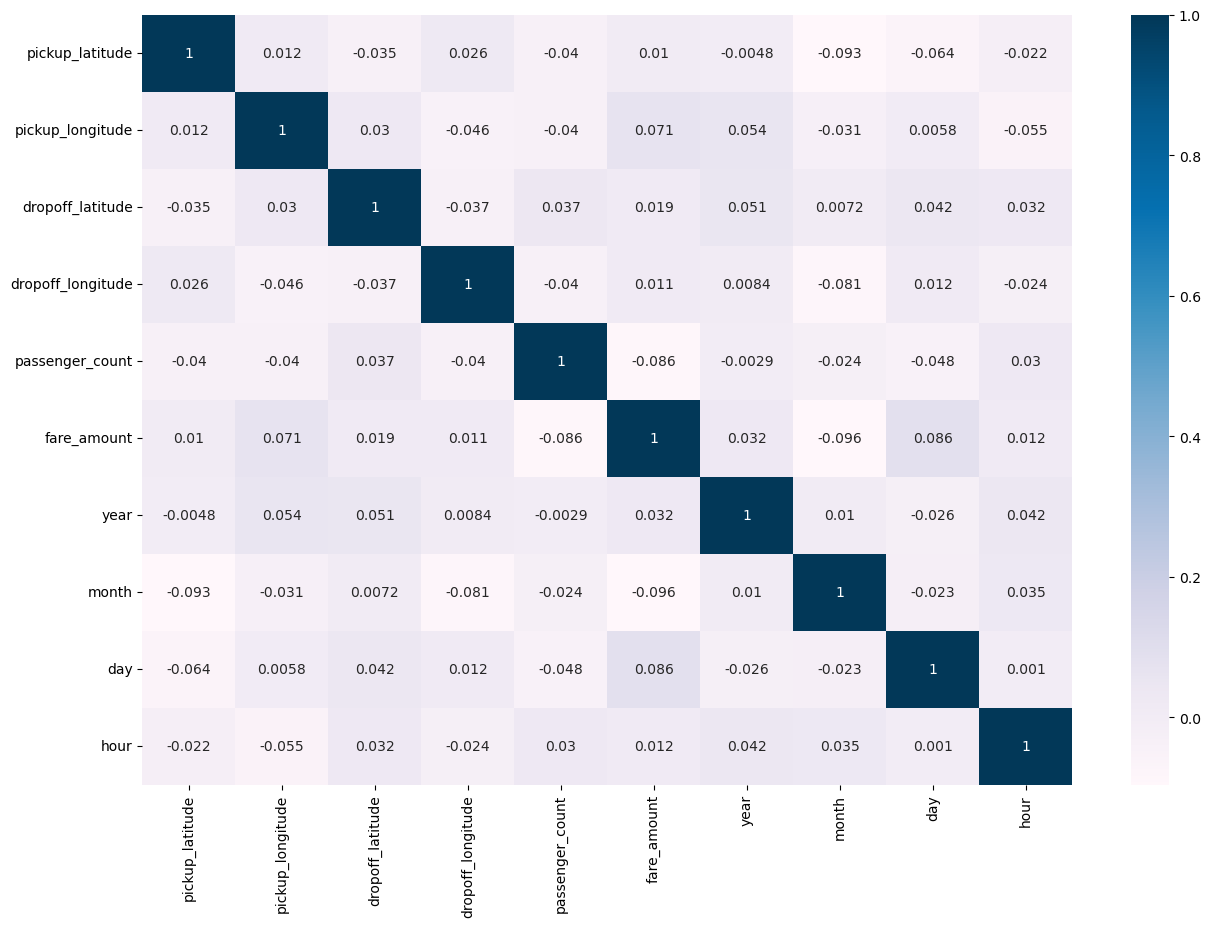

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# seaborn을 사용하여 heatmap 출력
plt.figure(figsize=(15,10))
# 제출 시 cmap이 'PuBu' 가 아니면 오답 처리 될 수 있습니다.
sns.heatmap(corr_df, annot=True, cmap='PuBu')
plt.show()